In [325]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


In [326]:
#read Data
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [327]:
bike.shape

(730, 16)

In [328]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [329]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [330]:
## Convert the datatype of dteday column to datetime
bike['dteday'] =  pd.to_datetime(bike['dteday'],format='%d-%m-%Y')
bike['dteday'].dtype

dtype('<M8[ns]')

In [331]:
## Extracting Year and Month
bike['year'] = pd.DatetimeIndex(bike['dteday']).year
bike['month'] = pd.DatetimeIndex(bike['dteday']).month
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [332]:
# Dropping the columns as we have extracte#d the correct year and month from the date.

bike.drop(['yr','mnth'],axis=1,inplace=True)

In [333]:
#Dropping the redundant variable holiday as the workingday column covers enough information that is required.

bike.drop('holiday',axis=1,inplace=True)

In [334]:
# Dropping the dteday,instant,casual and registered columns.

bike.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [335]:
# Renaming some columns for better understanding

bike.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)

In [336]:
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [337]:
##Step 2: Encoding the Labels and Visualization
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike['season'] = bike['season'].map(codes)

<AxesSubplot:xlabel='season', ylabel='count'>

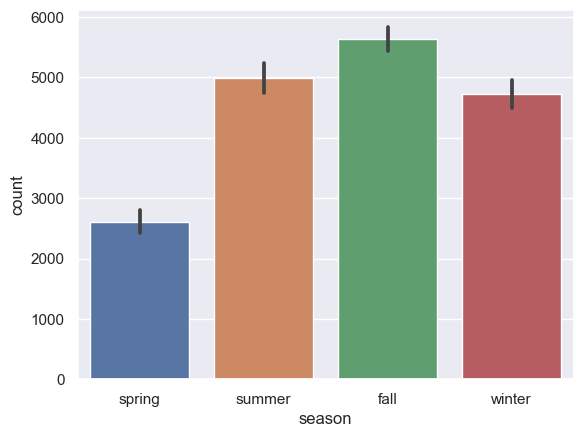

In [338]:
sns.barplot('season','count',data=bike)

In [339]:
## weathersit
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bike['weathersit'] = bike['weathersit'].map(codes)

<AxesSubplot:xlabel='weathersit', ylabel='count'>

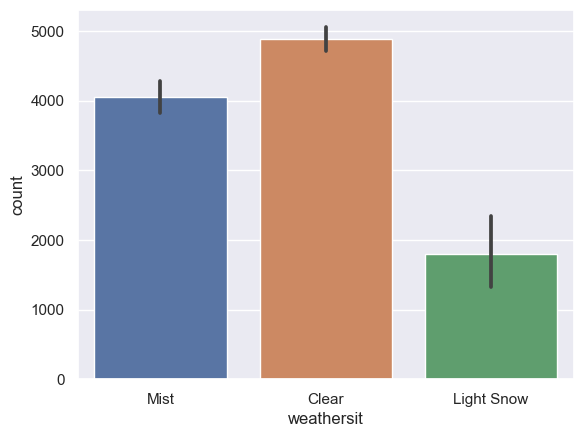

In [340]:
sns.barplot('weathersit','count',data=bike)

<AxesSubplot:xlabel='workingday', ylabel='count'>

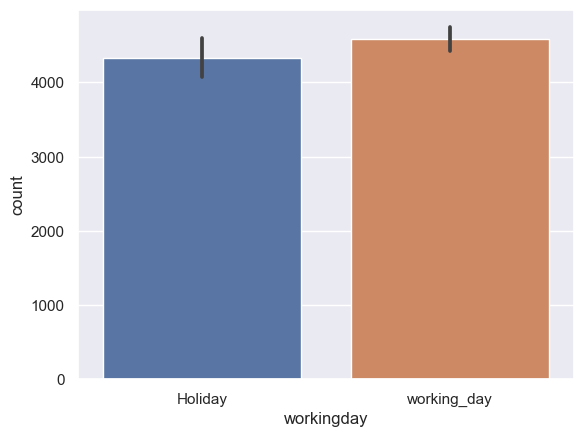

In [341]:
## workingday
codes = {1:'working_day',0:'Holiday'}
bike['workingday'] = bike['workingday'].map(codes)
sns.barplot('workingday','count',data=bike)

<AxesSubplot:xlabel='year', ylabel='count'>

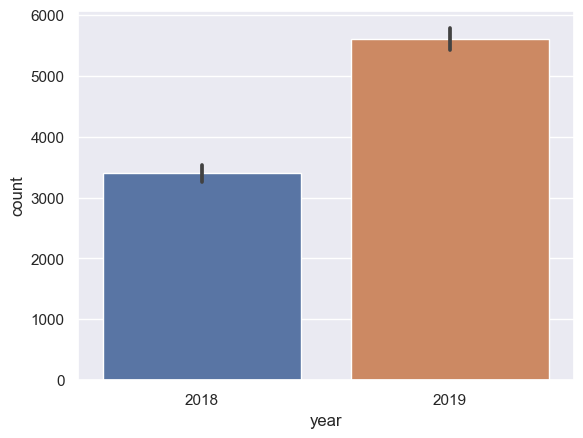

In [342]:
## Year
sns.barplot('year','count',data=bike)

<AxesSubplot:xlabel='month', ylabel='count'>

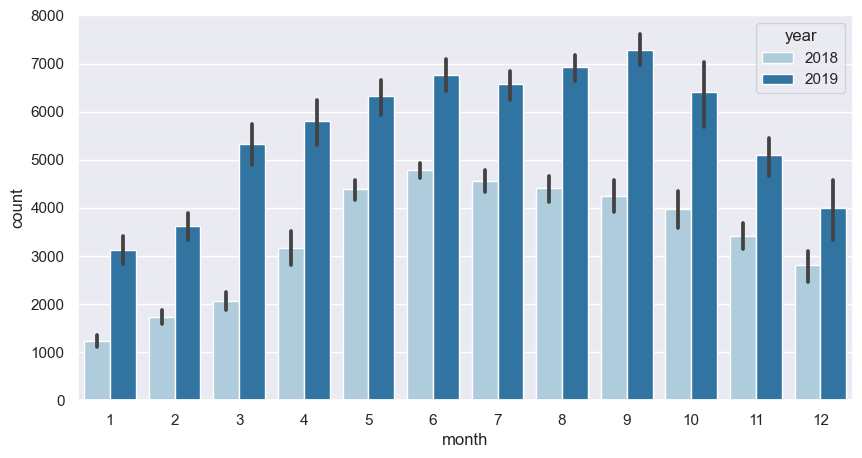

In [343]:
## Month
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=bike,palette='Paired')

In [344]:
## weekday

#codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
#bike['weekday'] = bike['weekday'].map(codes)

In [345]:
bike["weekday"]= bike["weekday"].convert_dtypes()
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   weekday     730 non-null    Int64  
 2   workingday  730 non-null    object 
 3   weathersit  730 non-null    object 
 4   temp        730 non-null    float64
 5   atemp       730 non-null    float64
 6   humidity    730 non-null    float64
 7   windspeed   730 non-null    float64
 8   count       730 non-null    int64  
 9   year        730 non-null    int64  
 10  month       730 non-null    int64  
dtypes: Int64(1), float64(4), int64(3), object(3)
memory usage: 63.6+ KB


In [346]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike['weekday'] = bike['weekday'].map(codes)

<AxesSubplot:xlabel='weekday'>

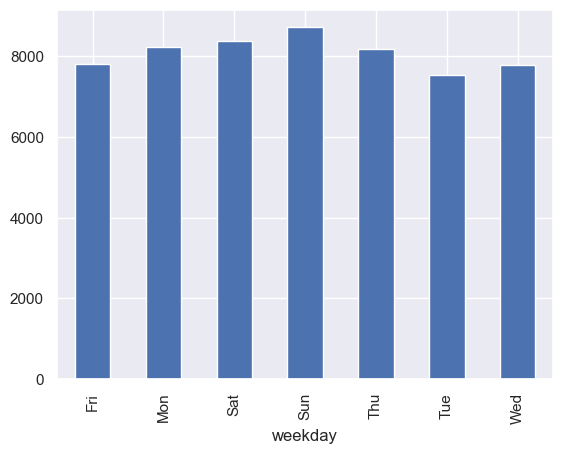

In [347]:
bike.groupby('weekday')['count'].max().plot(kind='bar')

## Bike is rented maximum on weekend

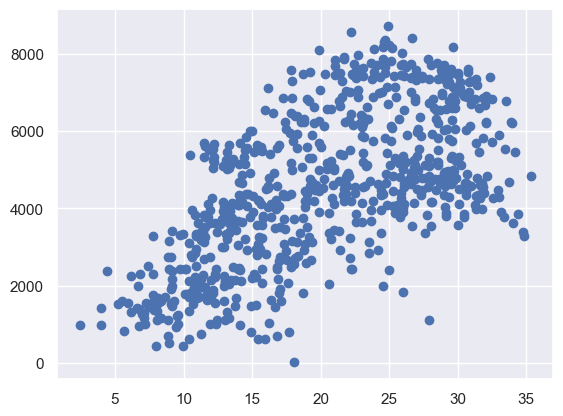

In [348]:
## temp
plt.scatter('temp','count',data=bike)

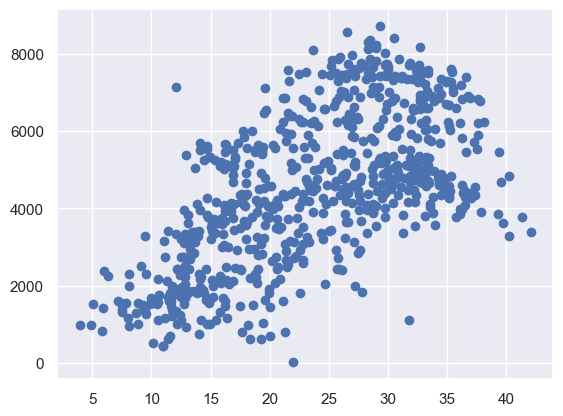

In [349]:
## atemp
plt.scatter('atemp','count',data=bike)

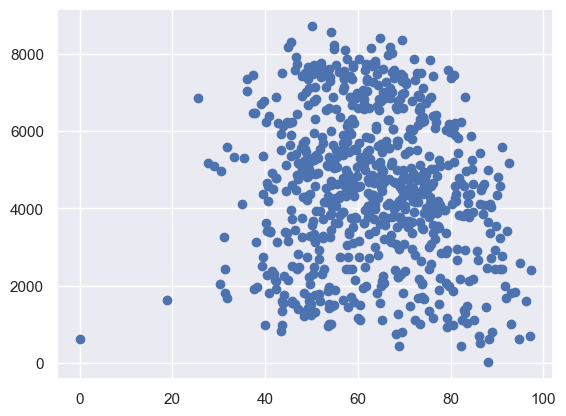

In [350]:
plt.scatter('humidity','count',data=bike)

##Temperature being directly proportional to Humidity, Bike Rentals are making during high humidity

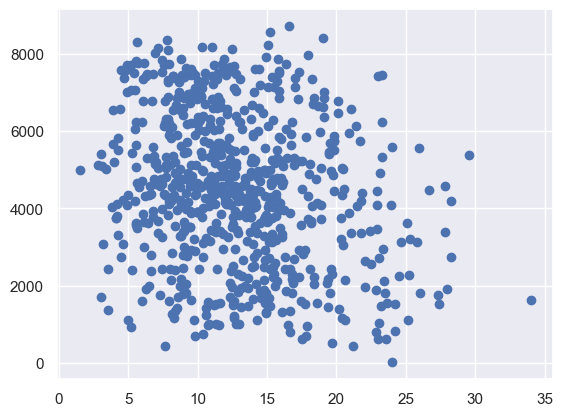

In [351]:
## windspeed
plt.scatter('windspeed','count',data=bike)

<AxesSubplot:xlabel='count', ylabel='Density'>

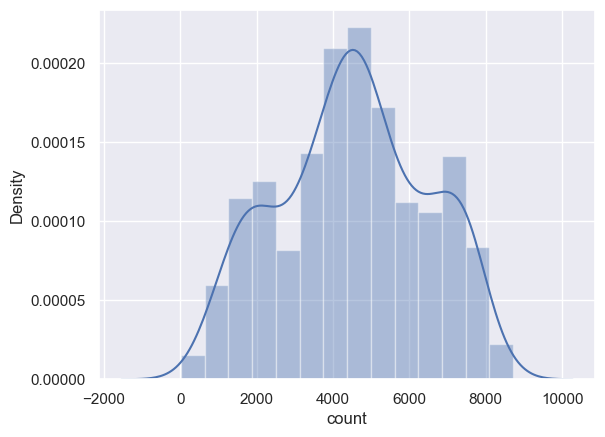

In [352]:
sns.distplot(bike['count'])

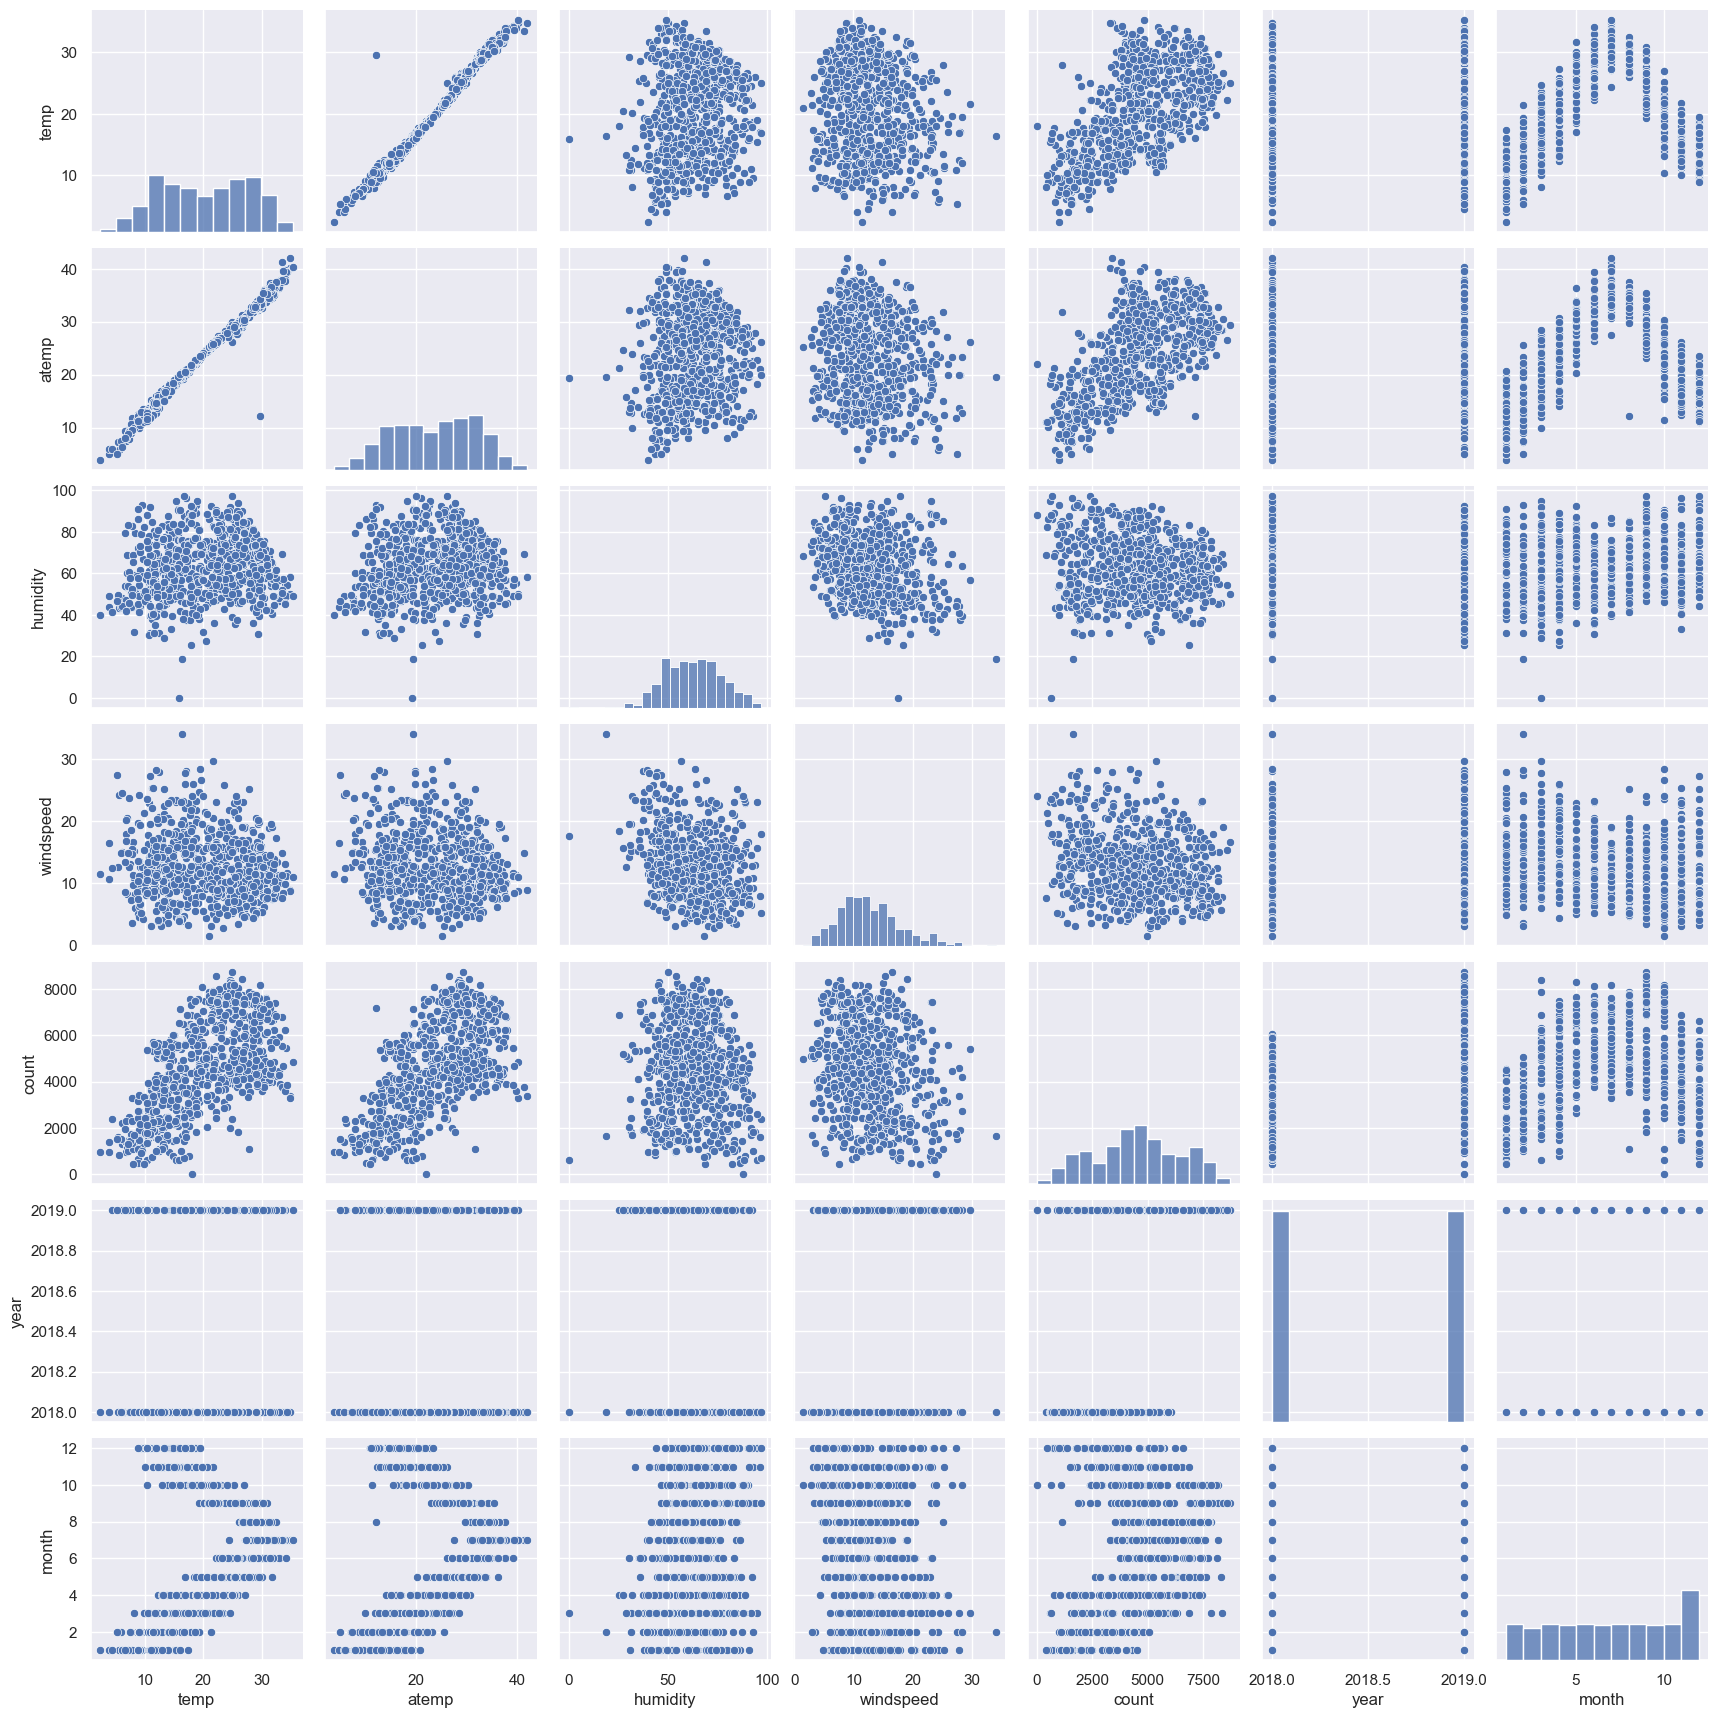

In [353]:
## Step 3: Visualizing the Relationship among variables
sns.pairplot(bike)

<AxesSubplot:>

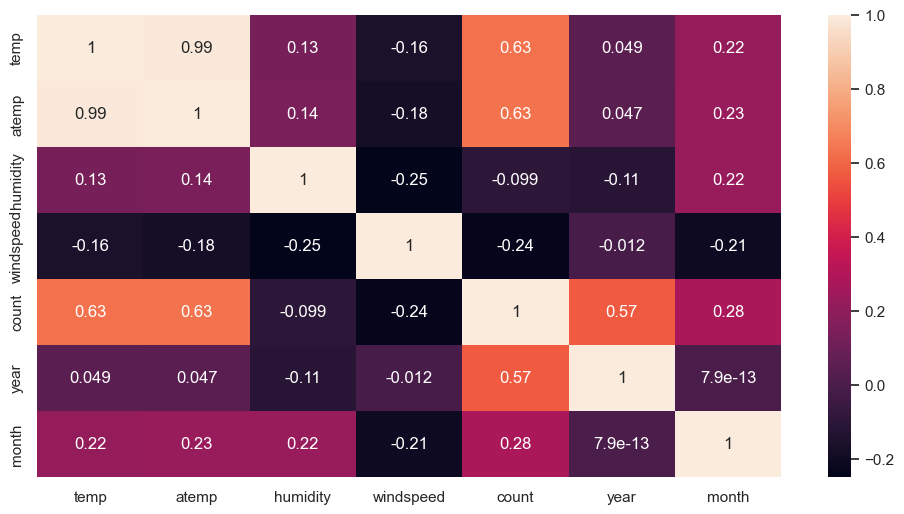

In [354]:
plt.figure(figsize = (12,6))
sns.heatmap(bike.corr(),annot=True)

In [355]:
## atemp and temp are highly correlated and one can be dropped to avoid multicollinearity. Also while riding bike, we feel atemp rather than temp as atemp is combination of moisture in air and temperature.
bike.drop('temp',axis=1,inplace=True)
bike.head()

,season,weekday,workingday,weathersit,atemp,humidity,windspeed,count,year,month
0,spring,Sun,Holiday,Mist,18.18125,80.5833,10.749882,985,2018,1
1,spring,Mon,Holiday,Mist,17.68695,69.6087,16.652113,801,2018,1
2,spring,Tue,working_day,Clear,9.47025,43.7273,16.636703,1349,2018,1
3,spring,Wed,working_day,Clear,10.60610,59.0435,10.739832,1562,2018,1
4,spring,Thu,working_day,Clear,11.46350,43.6957,12.522300,1600,2018,1


In [356]:
## Dealing With Categorical Variables
seasons = pd.get_dummies(bike['season'],drop_first=True)
working_day = pd.get_dummies(bike['workingday'],drop_first=True)
weather= pd.get_dummies(bike['weathersit'],drop_first=True)
month= pd.get_dummies(bike['month'],drop_first=True)
week_day= pd.get_dummies(bike['weekday'],drop_first=True)
bike.head()

,season,weekday,workingday,weathersit,atemp,humidity,windspeed,count,year,month
0,spring,Sun,Holiday,Mist,18.18125,80.5833,10.749882,985,2018,1
1,spring,Mon,Holiday,Mist,17.68695,69.6087,16.652113,801,2018,1
2,spring,Tue,working_day,Clear,9.47025,43.7273,16.636703,1349,2018,1
3,spring,Wed,working_day,Clear,10.60610,59.0435,10.739832,1562,2018,1
4,spring,Thu,working_day,Clear,11.46350,43.6957,12.522300,1600,2018,1


In [357]:
bike= pd.concat([bike,seasons,working_day,weather,month,week_day],axis=1)
bike.head()

,season,weekday,workingday,weathersit,atemp,humidity,windspeed,count,year,month,...,9,10,11,12,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Sun,Holiday,Mist,18.18125,80.5833,10.749882,985,2018,1,...,0,0,0,0,0,0,1,0,0,0
1,spring,Mon,Holiday,Mist,17.68695,69.6087,16.652113,801,2018,1,...,0,0,0,0,1,0,0,0,0,0
2,spring,Tue,working_day,Clear,9.47025,43.7273,16.636703,1349,2018,1,...,0,0,0,0,0,0,0,0,1,0
3,spring,Wed,working_day,Clear,10.60610,59.0435,10.739832,1562,2018,1,...,0,0,0,0,0,0,0,0,0,1
4,spring,Thu,working_day,Clear,11.46350,43.6957,12.522300,1600,2018,1,...,0,0,0,0,0,0,0,1,0,0


In [358]:
# Dropping the categorical variables as they are already dummy-encoded.

bike.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)
bike.head()

,atemp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,9,10,11,12,Mon,Sat,Sun,Thu,Tue,Wed
0,18.18125,80.5833,10.749882,985,2018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,17.68695,69.6087,16.652113,801,2018,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9.47025,43.7273,16.636703,1349,2018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,10.60610,59.0435,10.739832,1562,2018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,11.46350,43.6957,12.522300,1600,2018,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [359]:
## Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.75, test_size = 0.25, random_state = 100)

In [360]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [361]:
# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['atemp','humidity','windspeed','count']
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

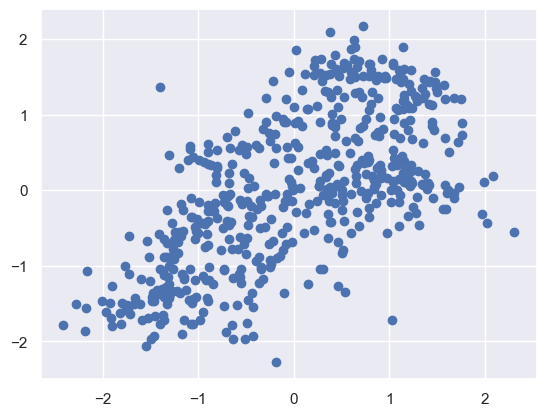

In [362]:
plt.scatter('atemp','count',data=df_train)

In [363]:
y_train = df_train.pop('count')
X_train = df_train

In [364]:
## Building a linear model
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [366]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [367]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('atemp', True, 1),
 ('humidity', False, 12),
 ('windspeed', False, 11),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 (2, False, 10),
 (3, False, 6),
 (4, False, 7),
 (5, False, 3),
 (6, False, 4),
 (7, False, 8),
 (8, False, 5),
 (9, True, 1),
 (10, True, 1),
 (11, False, 16),
 (12, False, 17),
 ('Mon', True, 1),
 ('Sat', False, 15),
 ('Sun', True, 1),
 ('Thu', False, 18),
 ('Tue', False, 13),
 ('Wed', False, 14)]

In [368]:
col = X_train.columns[rfe.support_]
col

Index([      'atemp',        'year',      'spring', 'working_day',
        'Light Snow',        'Mist',             9,            10,
               'Mon',         'Sun'],
      dtype='object')

In [369]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [370]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [371]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [372]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     254.6
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.57e-196
Time:                        14:33:15   Log-Likelihood:                -297.71
No. Observations:                 547   AIC:                             617.4
Df Residuals:                     536   BIC:                             664.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2106.3684     73.195    -28.777      0.000   -2250.153   -1962.584
atemp           0.3734      0.024     15.626      0.000       0.326       0.420
year            1.0434      0.036     28.775      0.000       0.972       1.115
spring         -0.6625      0.055    -12.109      0.000      -0.770      -0.555
working_day     0.5199      0.112      4.646      0.000       0.300       0.740
Light Snow     -1.3879      0.113    -12.231      0.000      -1.611      -1.165
Mist           -0.3574      0.039     -9.279      0.000      -0.433      -0.282
9               0.3583      0.069      5.213      0.000       0.223       0.493
10              0.3079      0.067      4.628      0.000       0.177       0.439
Mon             0.3047      0.119      2.564      0.011       0.071       0.538
Sun             0.5429      0.119      4.569      0.000       0.309       0.776
==============================================================================
Omnibus:                       90.343   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.832
Skew:                          -0.778   Prob(JB):                     2.09e-60
Kurtosis:                       6.104   Cond. No.                     8.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [373]:
## Dropping Mon as it is insignificant.
X_train1= X_train_rfe.drop('Mon',1)

In [374]:
X_train2= sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit()

In [375]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     279.3
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.88e-196
Time:                        14:34:01   Log-Likelihood:                -301.05
No. Observations:                 547   AIC:                             622.1
Df Residuals:                     537   BIC:                             665.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2102.1629     73.555    -28.579      0.000   -2246.655   -1957.671
atemp           0.3768      0.024     15.713      0.000       0.330       0.424
year            1.0415      0.036     28.580      0.000       0.970       1.113
spring         -0.6657      0.055    -12.107      0.000      -0.774      -0.558
working_day     0.2610      0.049      5.381      0.000       0.166       0.356
Light Snow     -1.3836      0.114    -12.132      0.000      -1.608      -1.160
Mist           -0.3556      0.039     -9.187      0.000      -0.432      -0.280
9               0.3476      0.069      5.041      0.000       0.212       0.483
10              0.3092      0.067      4.623      0.000       0.178       0.441
Sun             0.2846      0.063      4.494      0.000       0.160       0.409
==============================================================================
Omnibus:                       92.742   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.427
Skew:                          -0.804   Prob(JB):                     3.47e-61
Kurtosis:                       6.104   Cond. No.                     8.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [376]:
## Now we have all the variables with p-value less than 0.05
X_train_new= X_train2.drop('const',axis=1)

In [377]:
## Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,year,7.09
3,working_day,4.80
2,spring,2.37
8,Sun,1.86
0,atemp,1.74
5,Mist,1.60
7,10,1.20
6,9,1.17
4,Light Snow,1.09


In [378]:
## Residual Analysis of the train data
y_train_pred = lm1.predict(X_train2)

Text(0.5, 0, 'Errors')

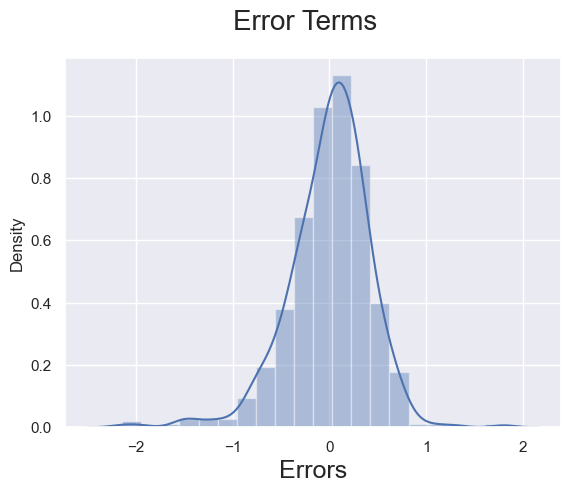

In [379]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)     # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [382]:
## Predictions

num_vars=['atemp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [383]:
## Dividing into X_test and y_test

y_test = df_test.pop('count')
X_test = df_test

In [384]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [385]:
# Making predictions
y_test_pred = lm1.predict(X_test_new)

Text(0, 0.5, 'Predictions')

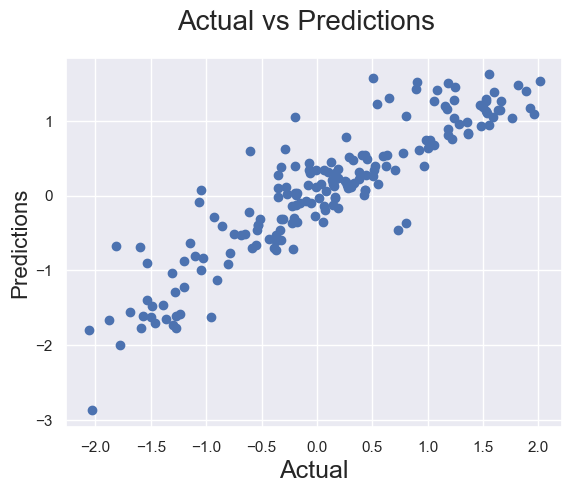

In [386]:
## Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)                          # Y-label

In [387]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8154884626505077

##Conclusion   
## Assumptions of Linear Regression:
# The error terms are normally distributed.
# The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
# The predicted values have linear relationship with the actual values.